In [3]:
from google.colab import files
files.upload()

! pip install -q kaggle
! mkdir ~/.kaggle # making new directory
! cp kaggle.json ~/.kaggle/ # copying kaggle json file to the created directory
! chmod 600 ~/.kaggle/kaggle.json # changing the permissions
! kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022 # downloading the dataset
! mkdir data # making new directory on colab session to unzip the dataset in it
! unzip -q bank-account-fraud-dataset-neurips-2022.zip -d data # unzipping the downloaded data

Saving kaggle.json to kaggle.json
 99% 541M/546M [00:06<00:00, 72.8MB/s]
100% 546M/546M [00:06<00:00, 84.6MB/s]


In [1]:
# ! pip install -r requirements.txt

# loading the classes

In [1]:
from data_cleaning import *
from modeling import *
from nn_modeling import *
from preprocessing import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [3]:
df=data_cleaning('/content/data/Base.csv')

In [ ]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


In [ ]:
df.check_duplicates()

'this data has no duplicates'

In [ ]:
df.describe(flag='numerical')

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,16.718568,86.587867,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,3.288674
std,0.289125,44.046230,88.406599,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,2.209994
min,0.000001,-1.000000,-1.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,0.000000
1%,0.021672,-1.000000,0.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,-1.000000,200.000000,0.651256,0.000000
25%,0.225216,-1.000000,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,0.492153,-1.000000,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,3.000000
75%,0.755567,12.000000,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,5.000000
99%,0.997470,231.000000,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,31.000000,1500.000000,44.552828,7.000000
max,0.999999,383.000000,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,7.000000


In [ ]:
df.describe(flag='categorical')

,fraud_bool,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w
count,1000000,1000000.0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,9.0,9,5,7,2,7,2,2,2,2,2,5,2,4
top,0,0.9,30,AB,CA,1,BC,0,1,0,0,INTERNET,other,1,1
freq,988971,221419.0,311433,370554,730252,529886,372143,582923,889676,777012,974758,992952,342728,576947,968067


In [ ]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  category
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  category
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

# check the nulls:(optional)

In [ ]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


In [4]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

<AxesSubplot: >

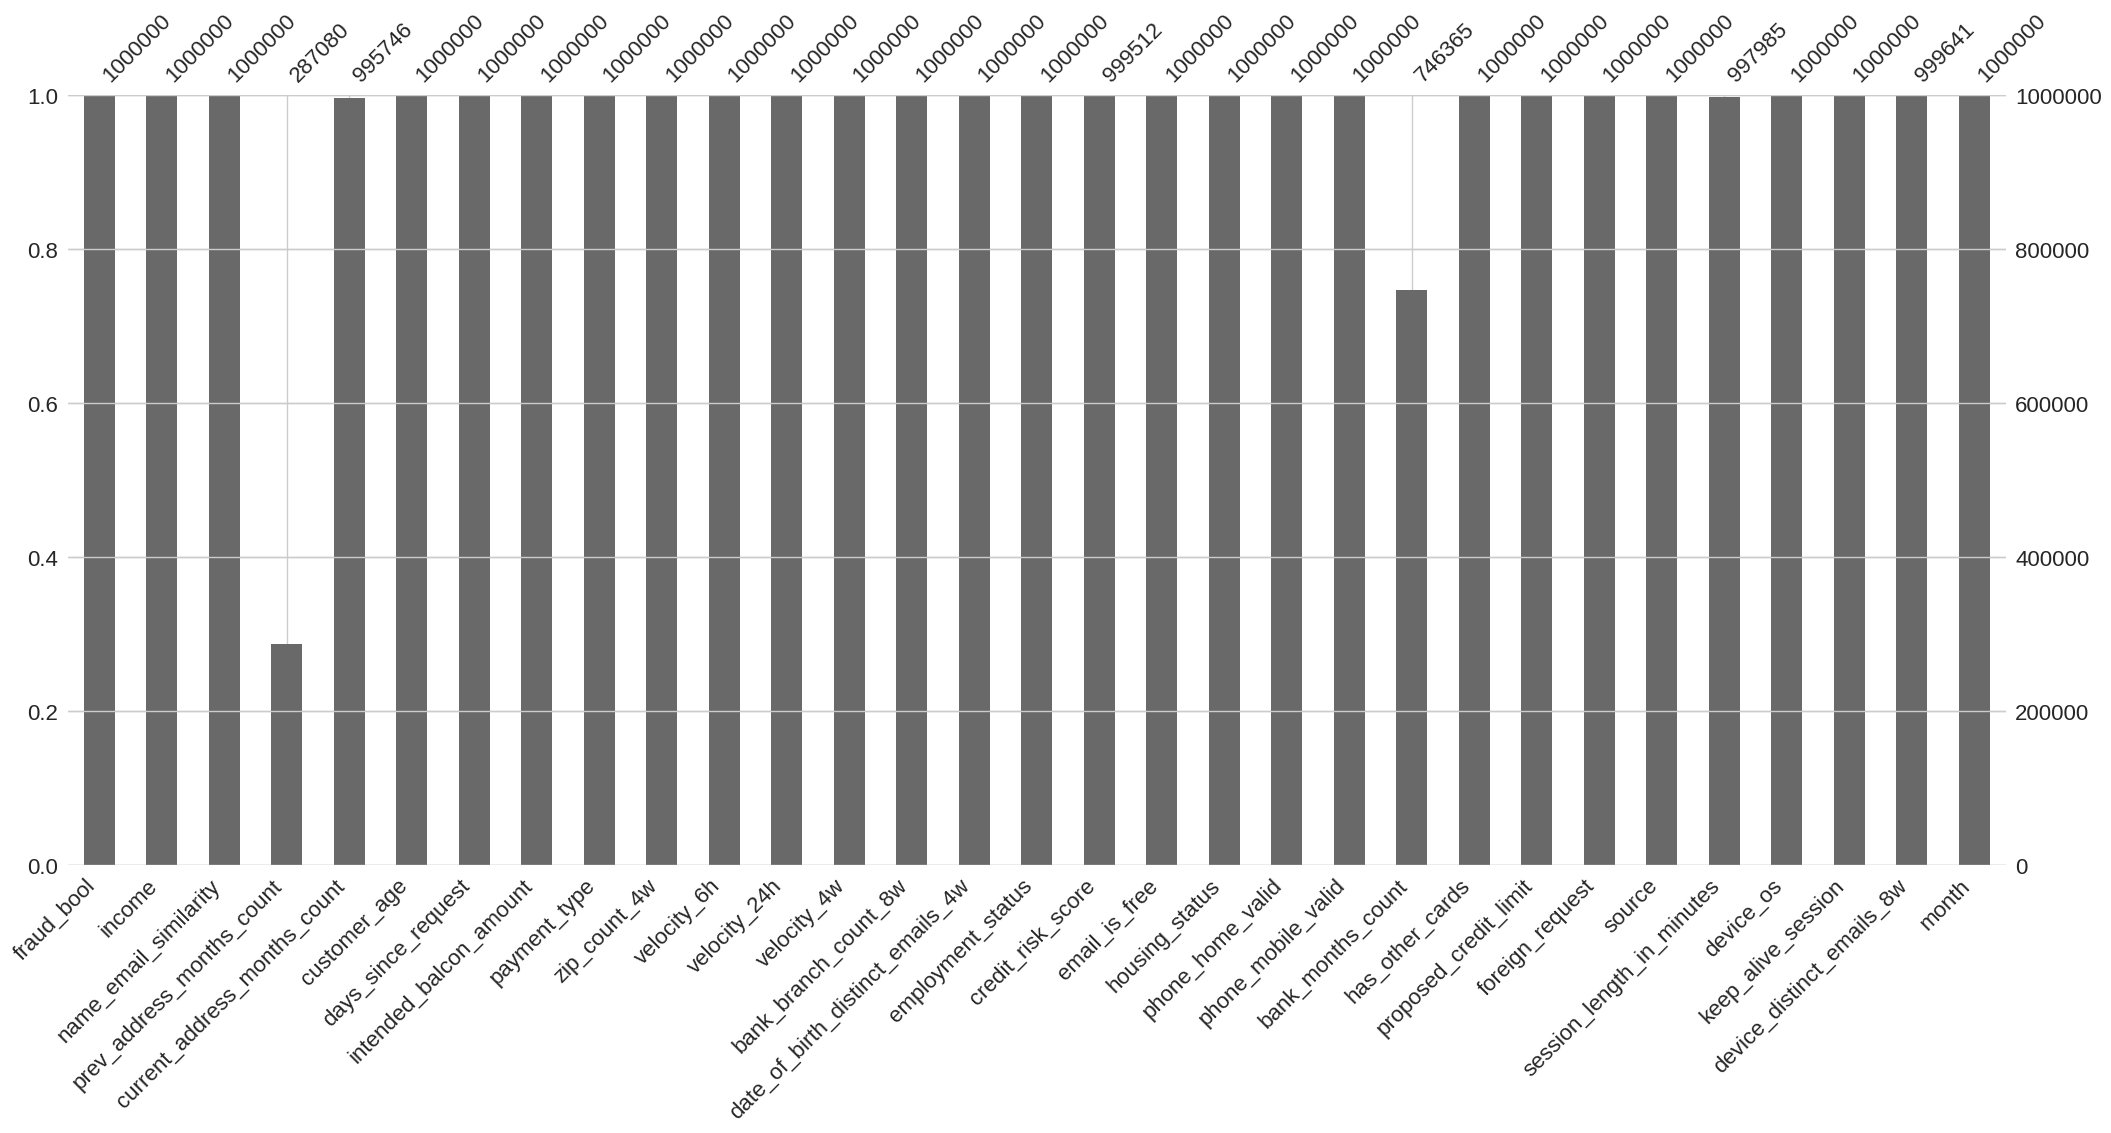

In [ ]:
msno.bar(df.data)

<AxesSubplot: >

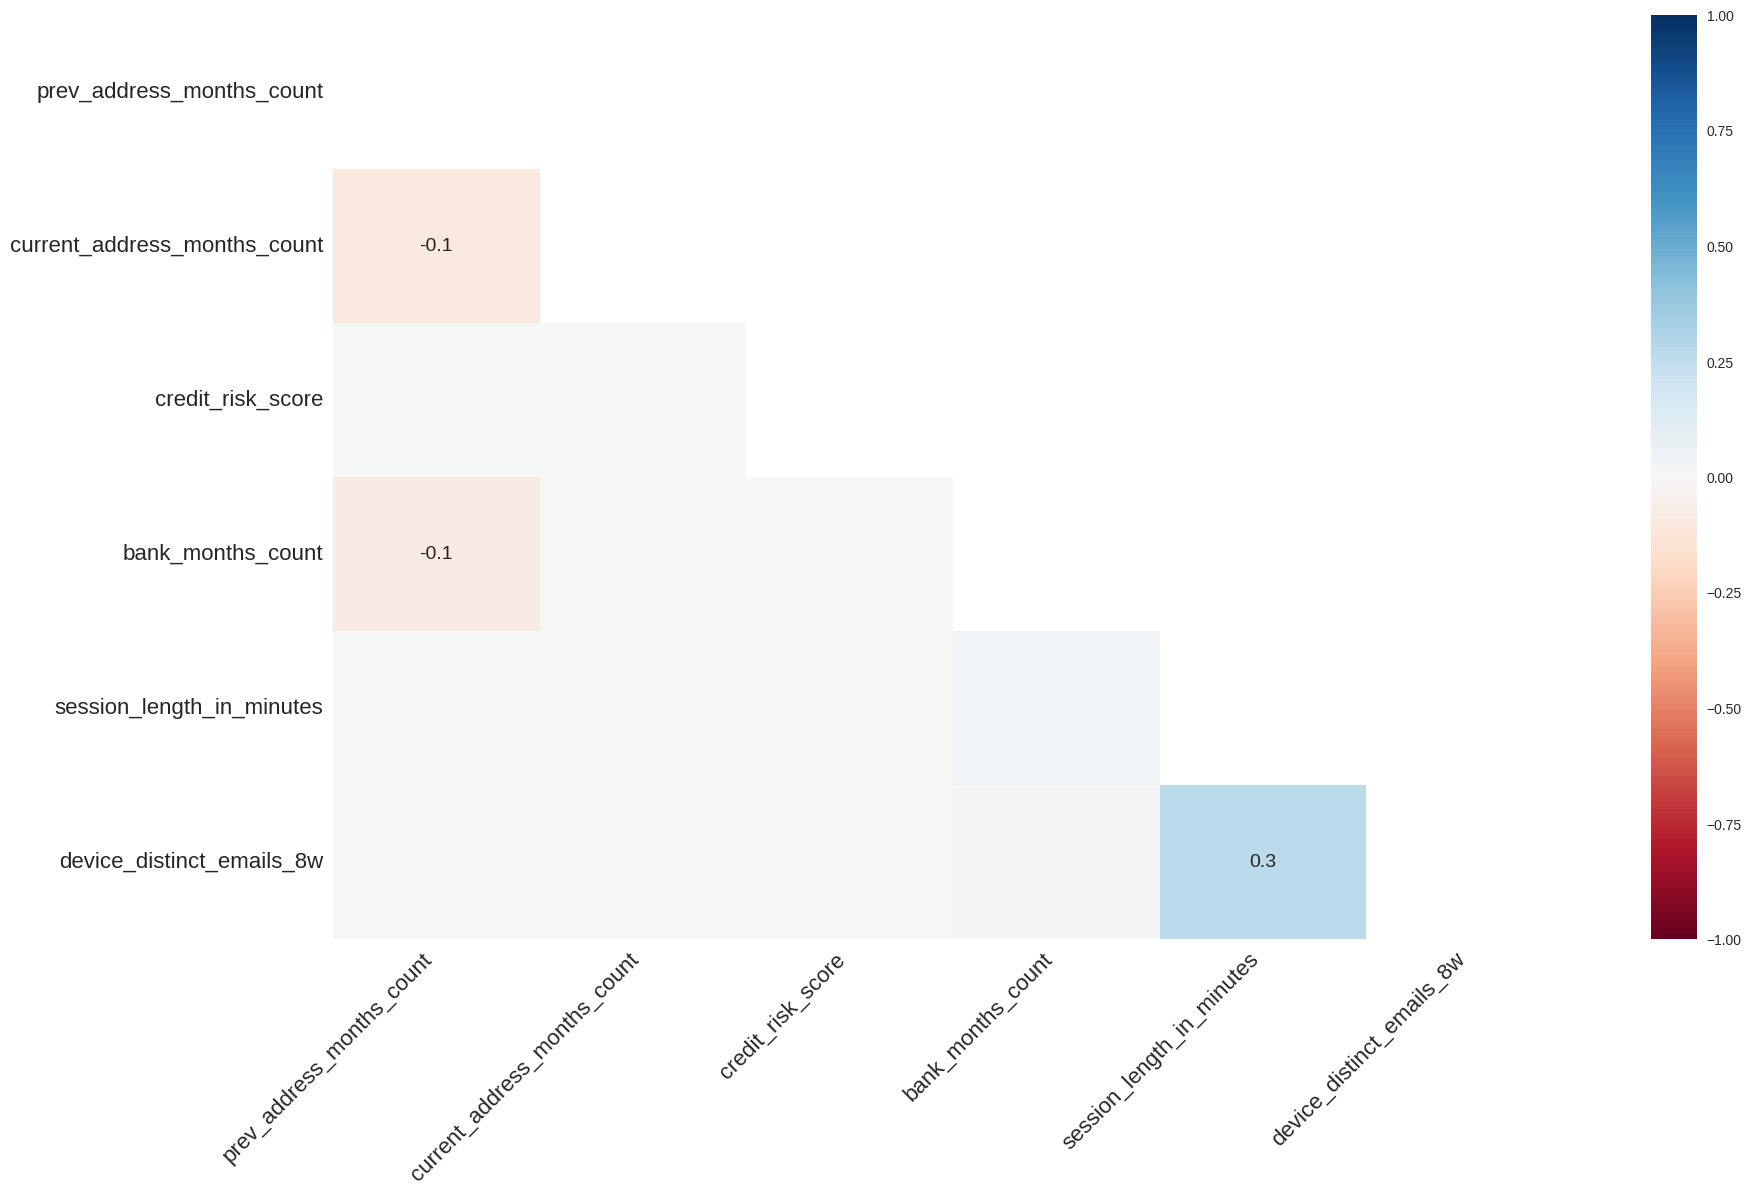

In [ ]:
msno.heatmap(df.data)

<AxesSubplot: >

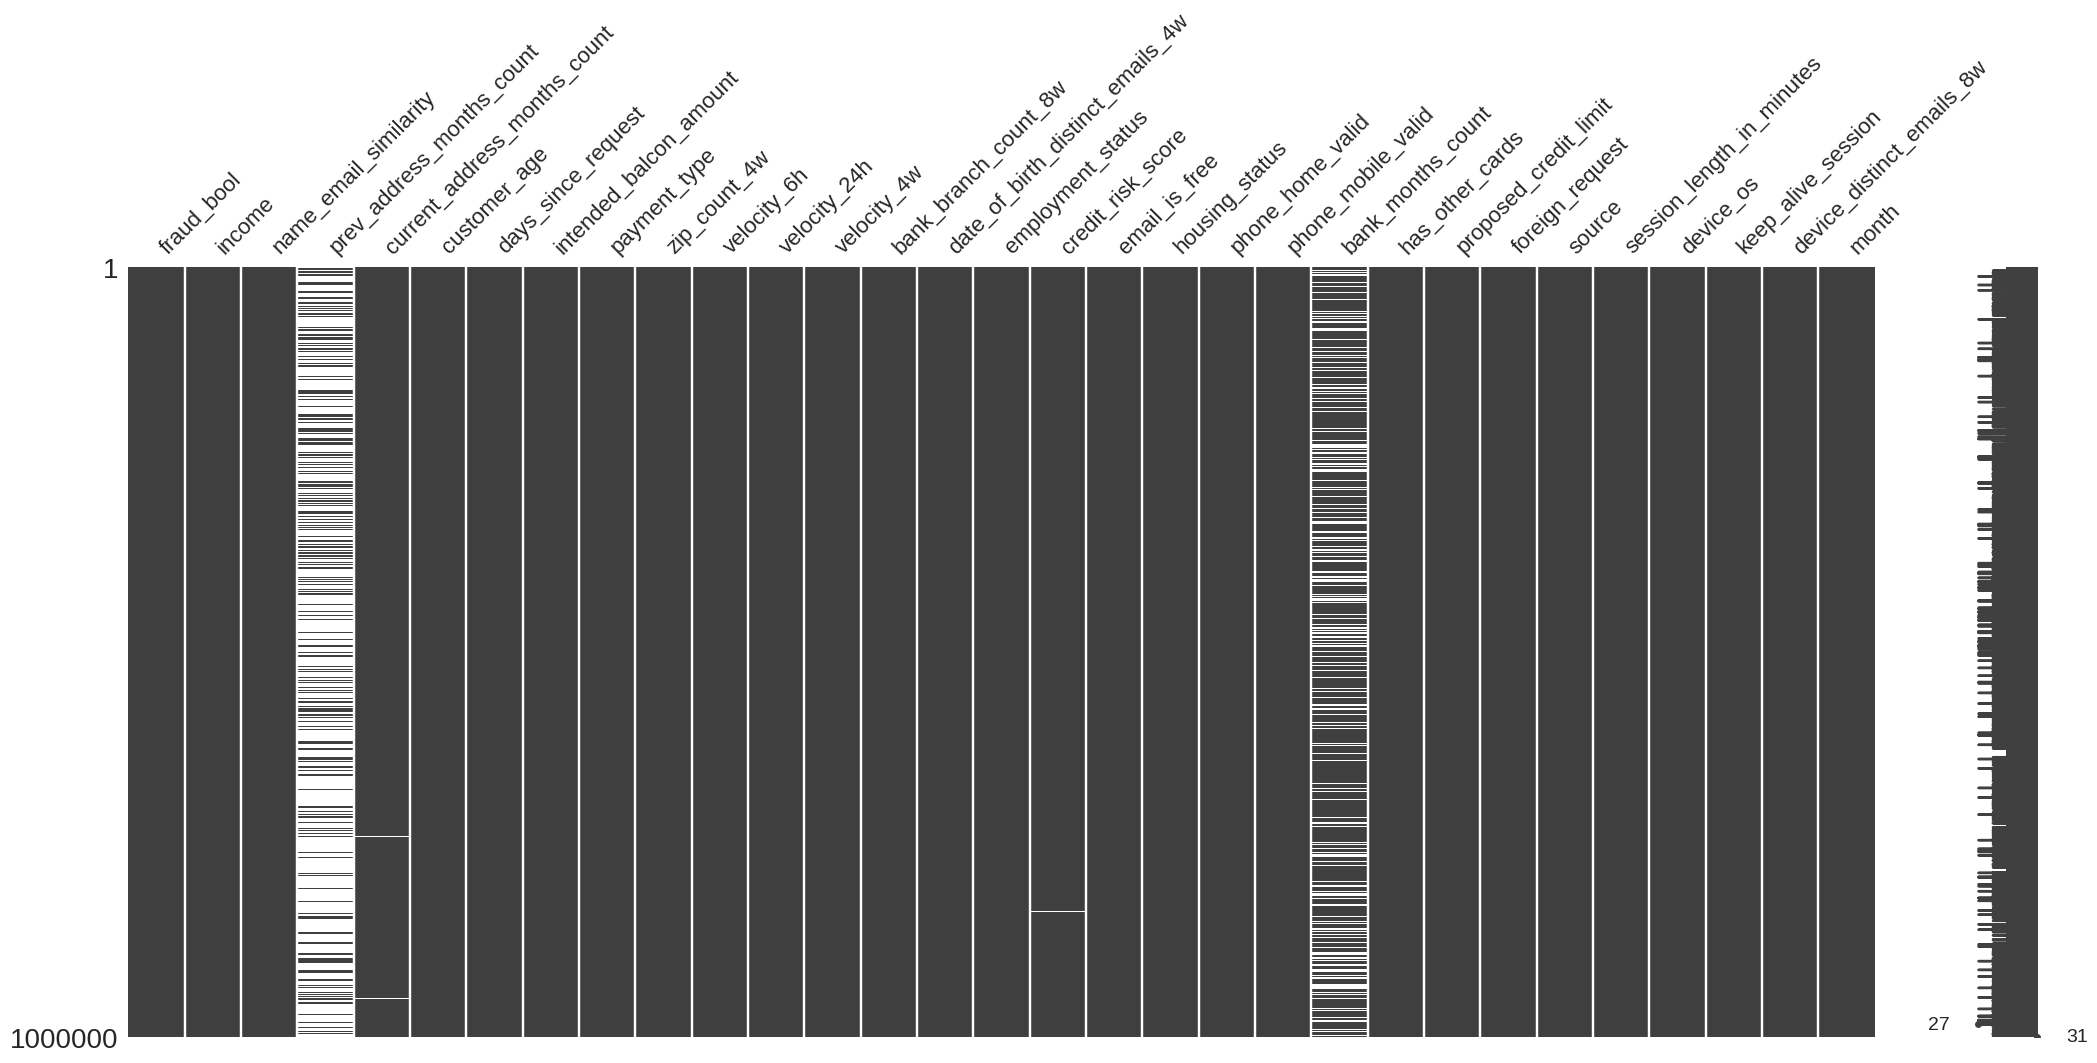

In [ ]:
msno.matrix(df.data)

- i will delete prev_address_months_count and bank_months_count

In [5]:
df.delete_columns(['prev_address_months_count','bank_months_count'])

'Columns prev_address_months_count, bank_months_count deleted successfully.'

# Handling the nulls:

In [6]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

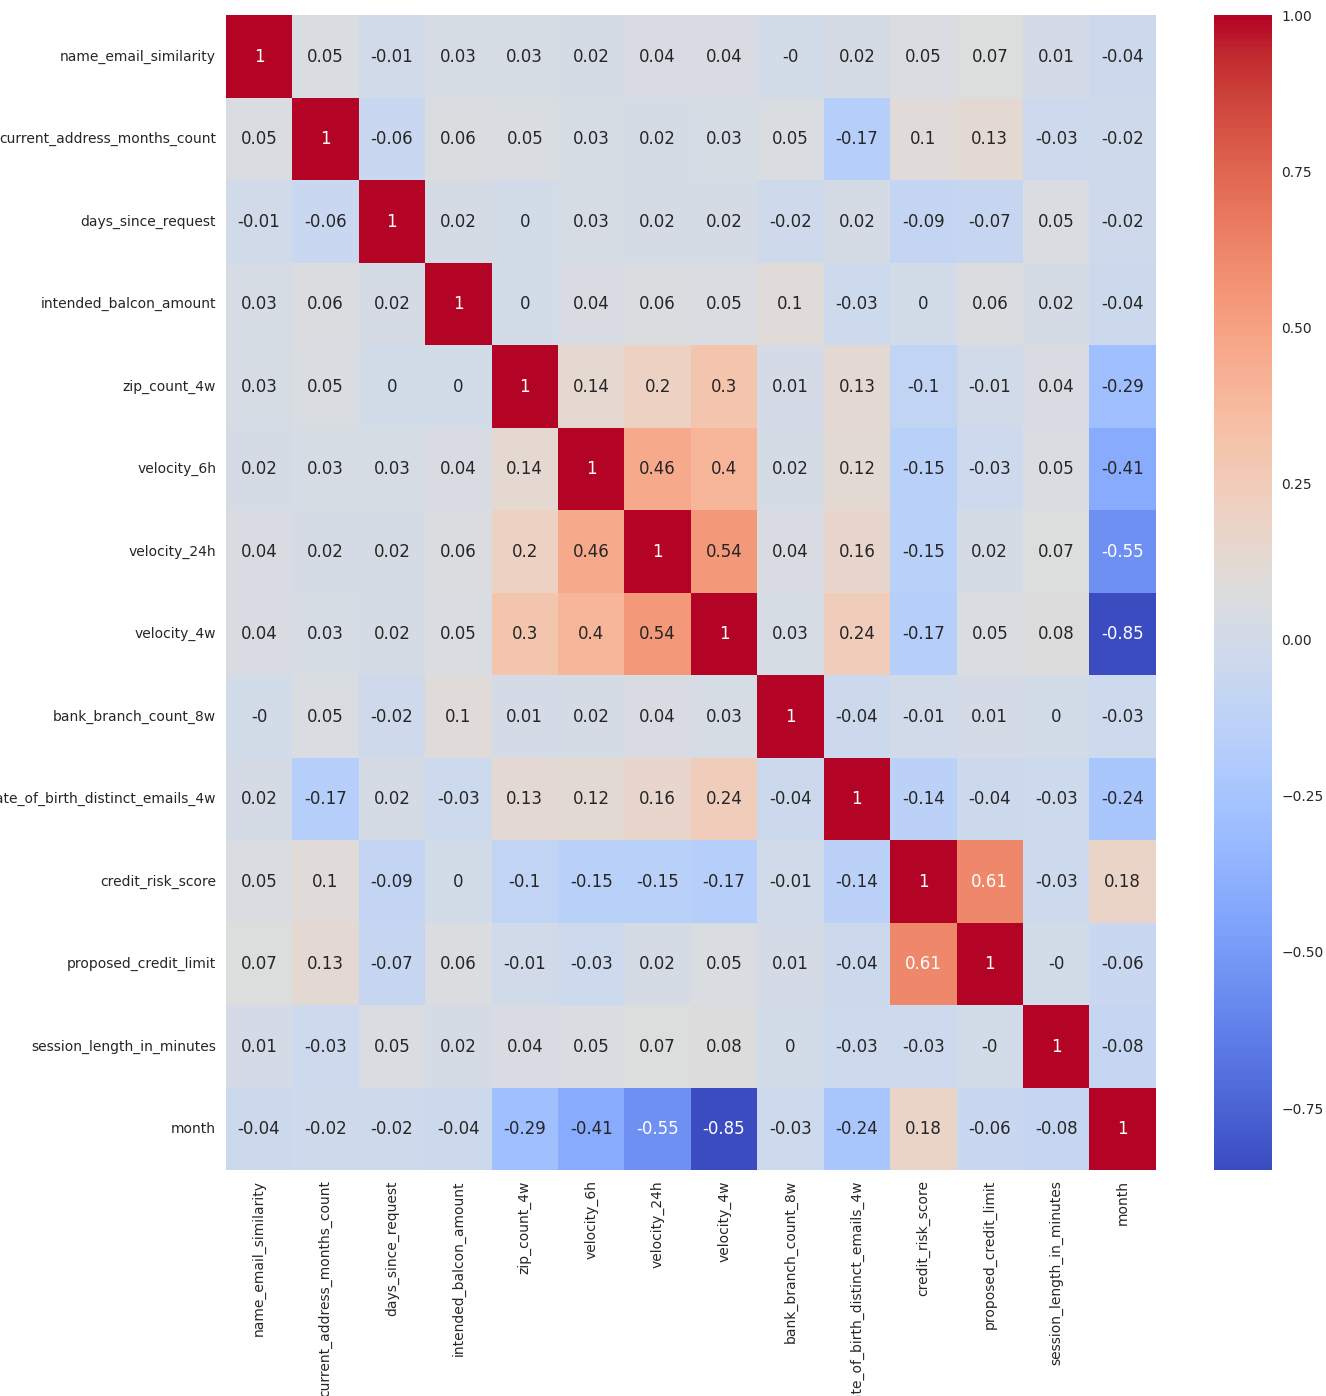

In [ ]:
df.plot_corr_heatmap()

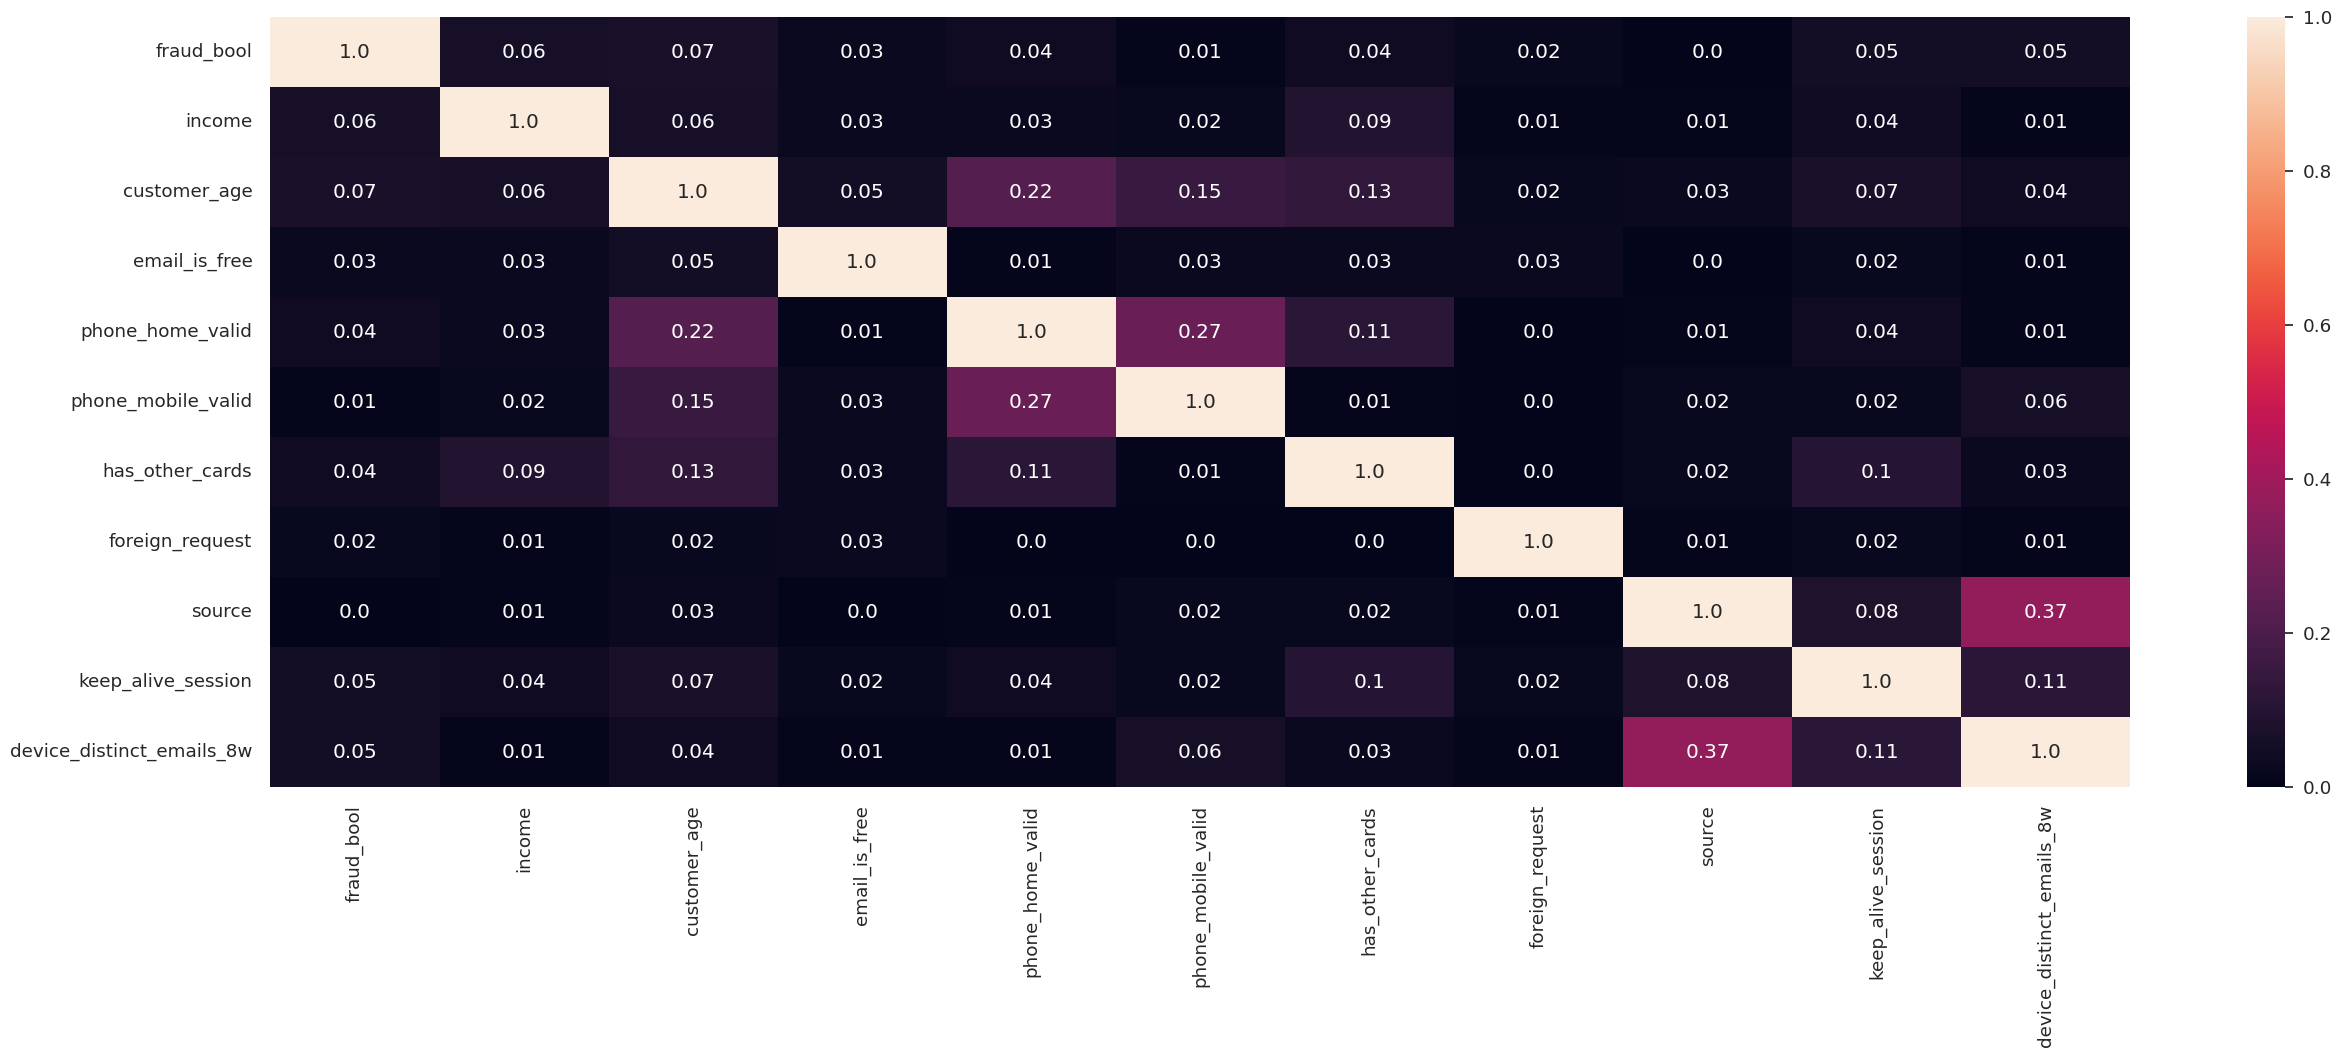

In [ ]:
df.plot_cramer()

velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


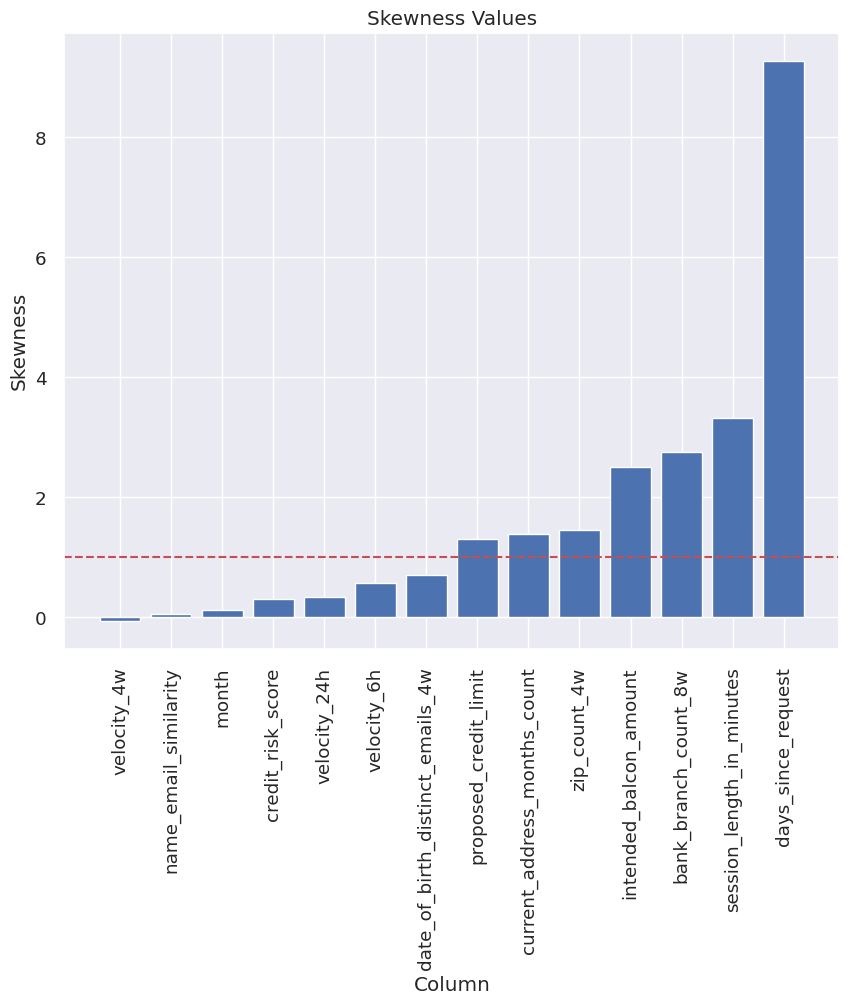

In [ ]:
skewed_columns=df.draw_skewness_barchart()

In [ ]:
# for column in skewed_columns:
#     if column =='intended_balcon_amount':
#         continue
#     print(df.apply_log_transform(column))

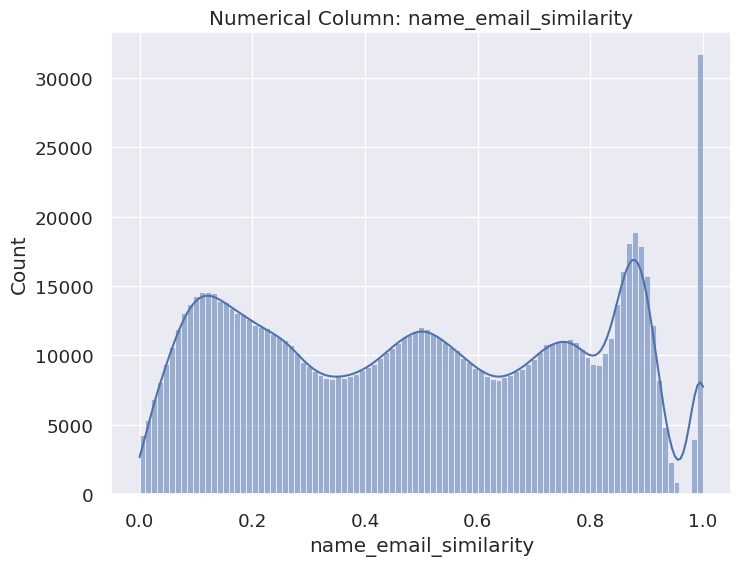

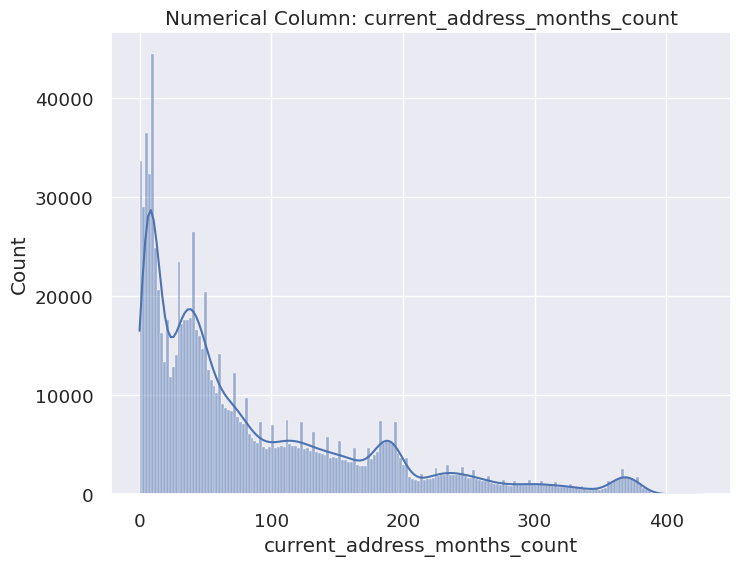

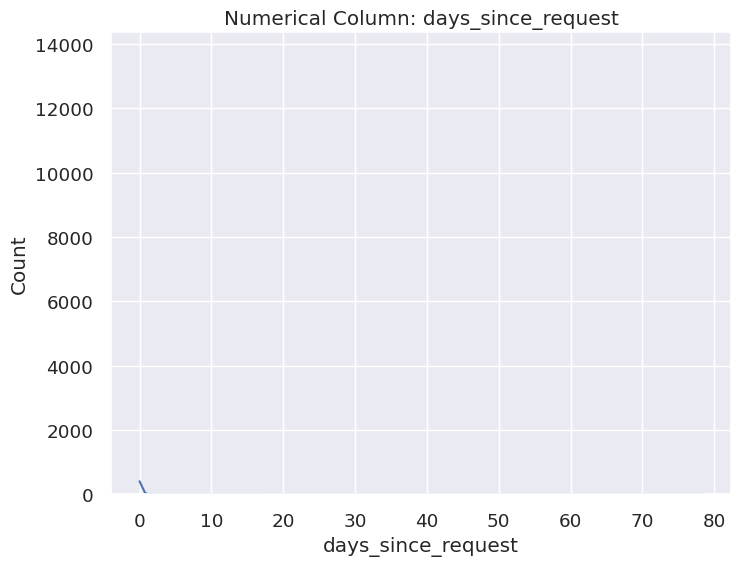

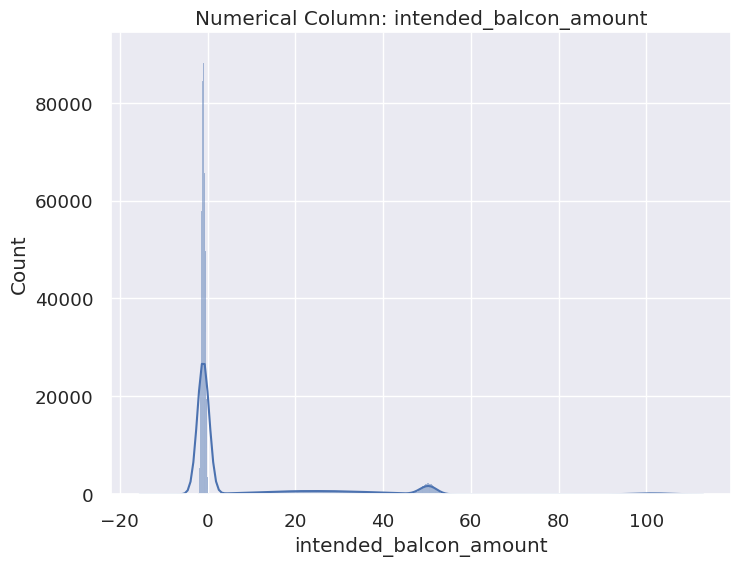

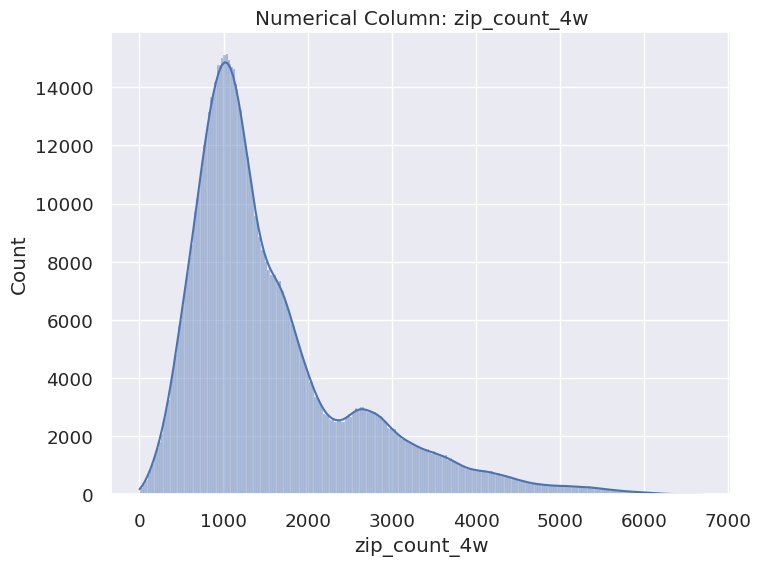

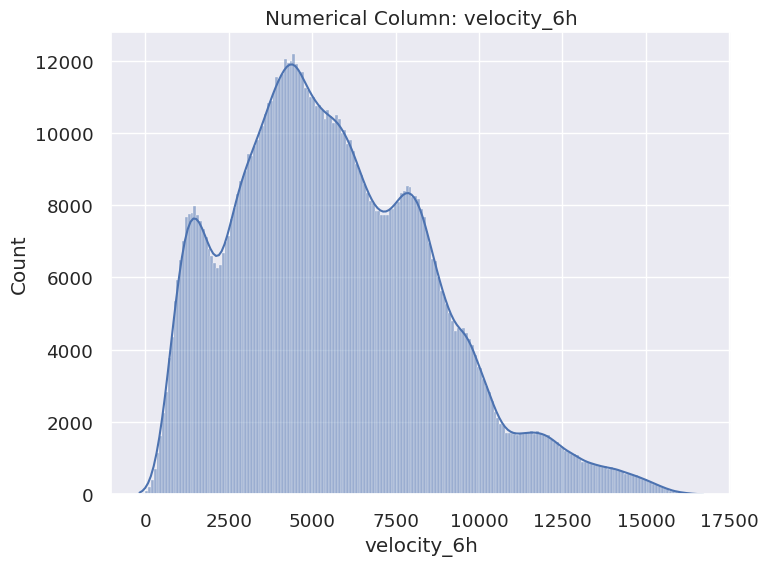

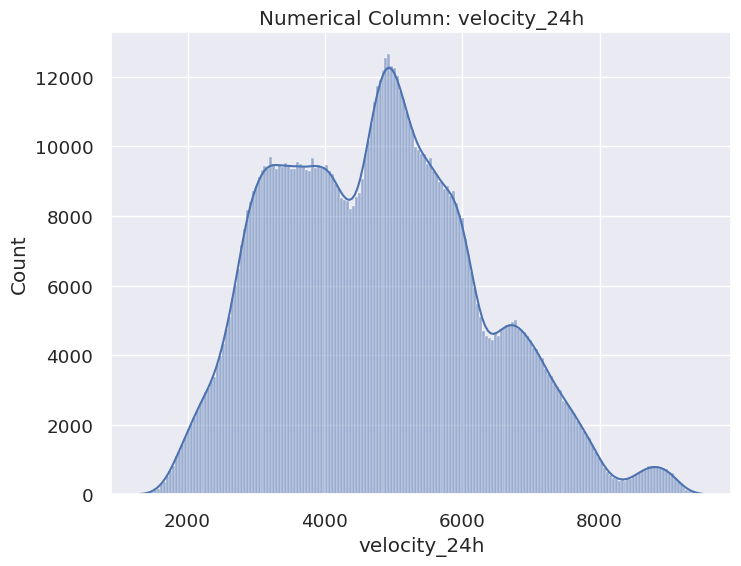

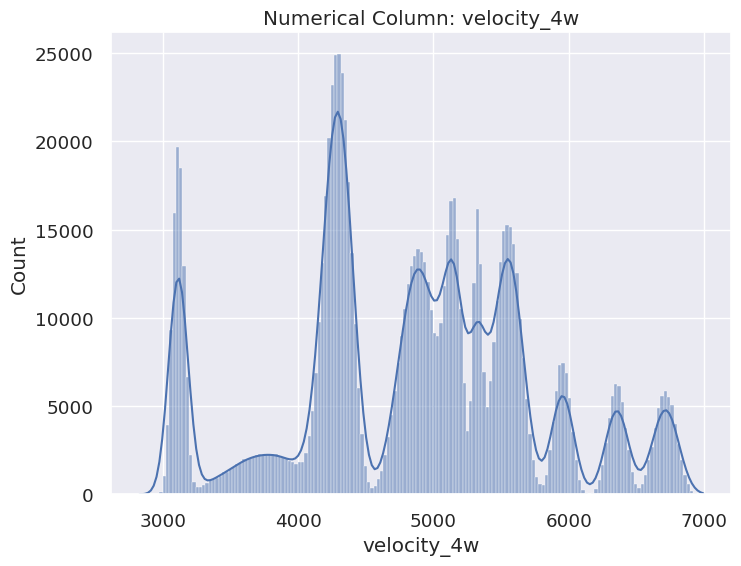

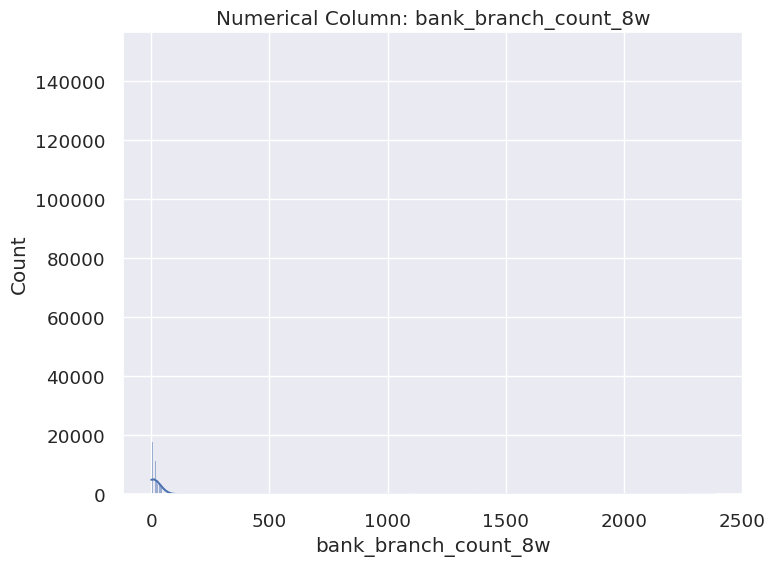

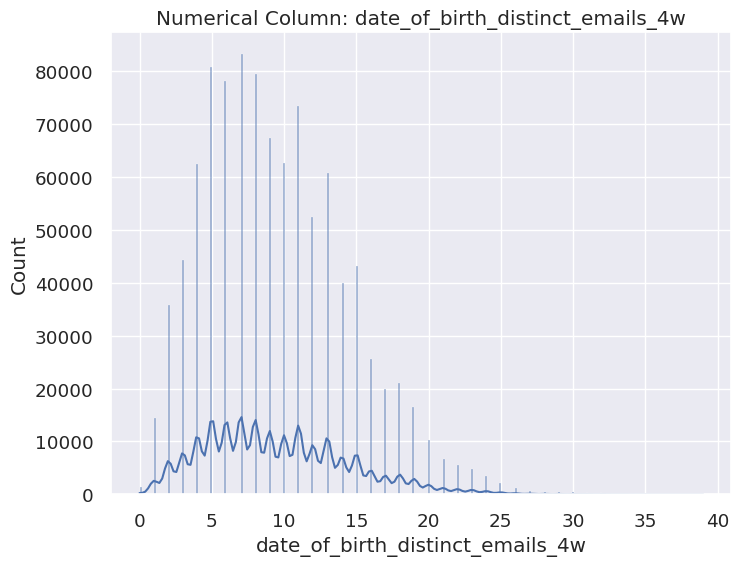

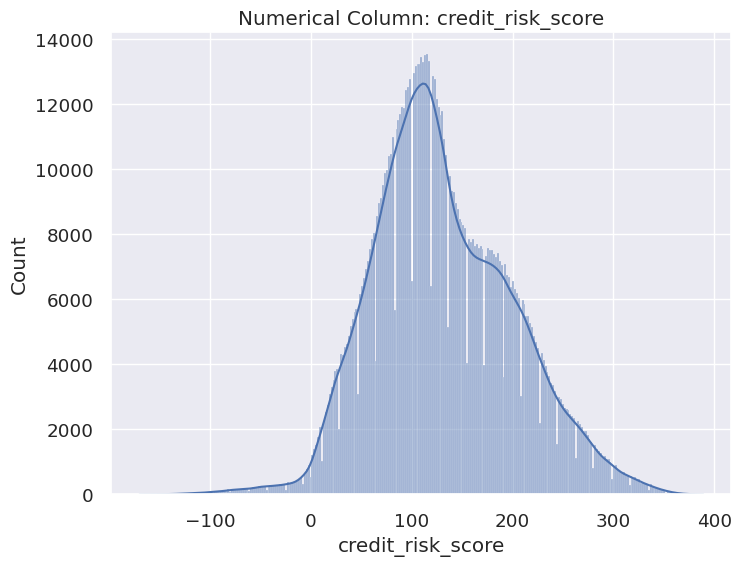

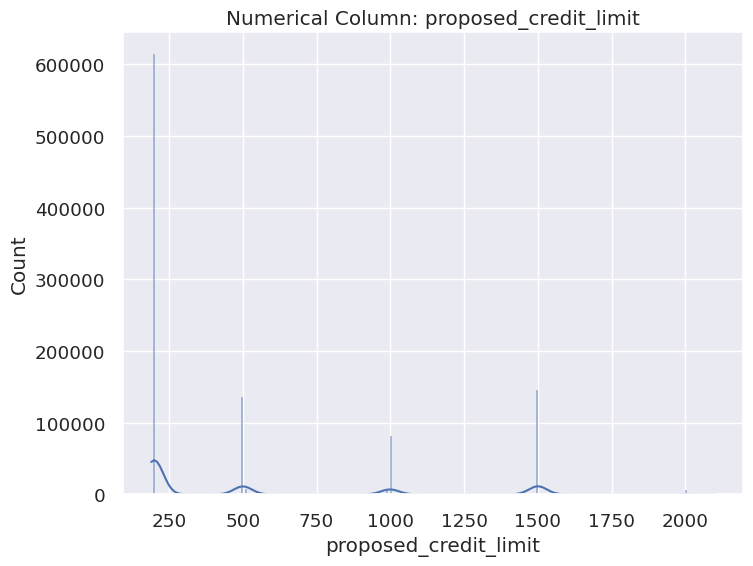

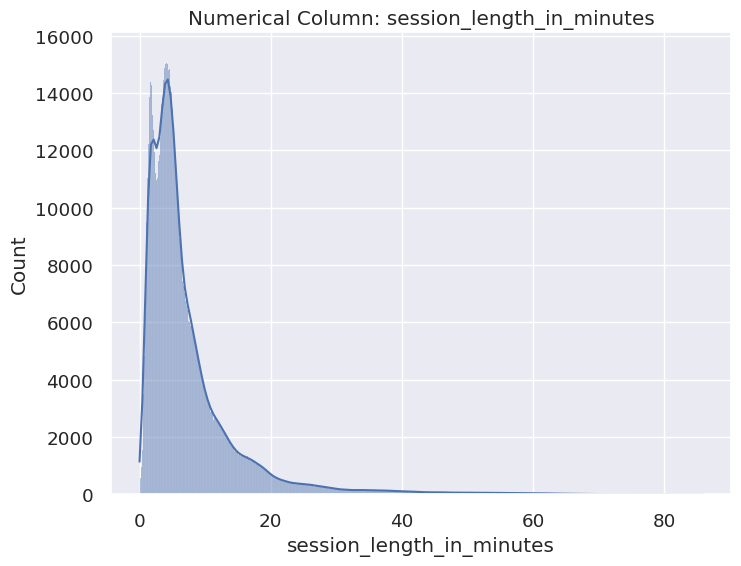

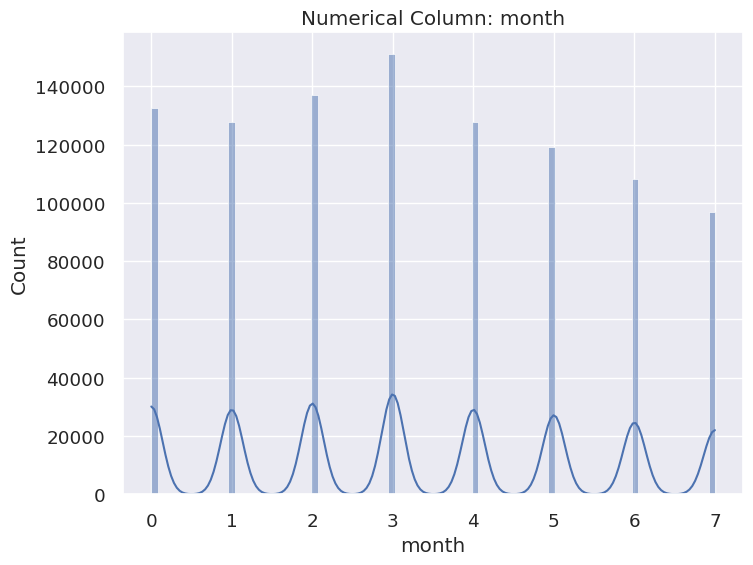

In [ ]:
df.plot_numerical_columns()

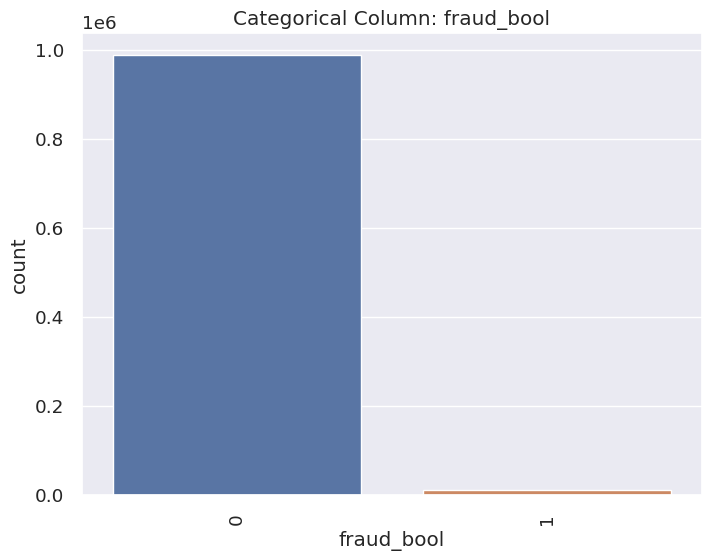

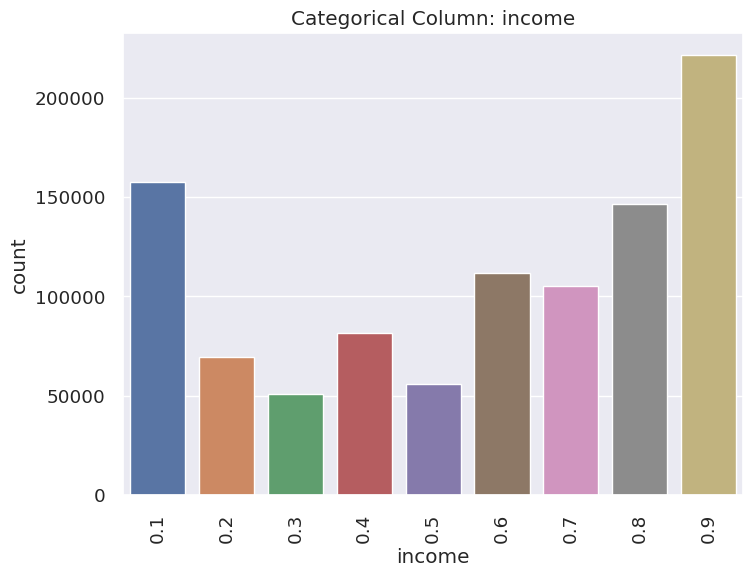

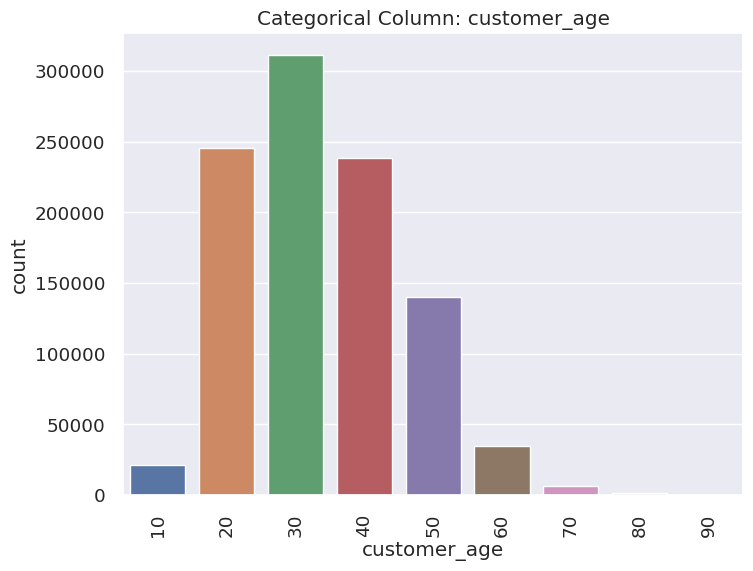

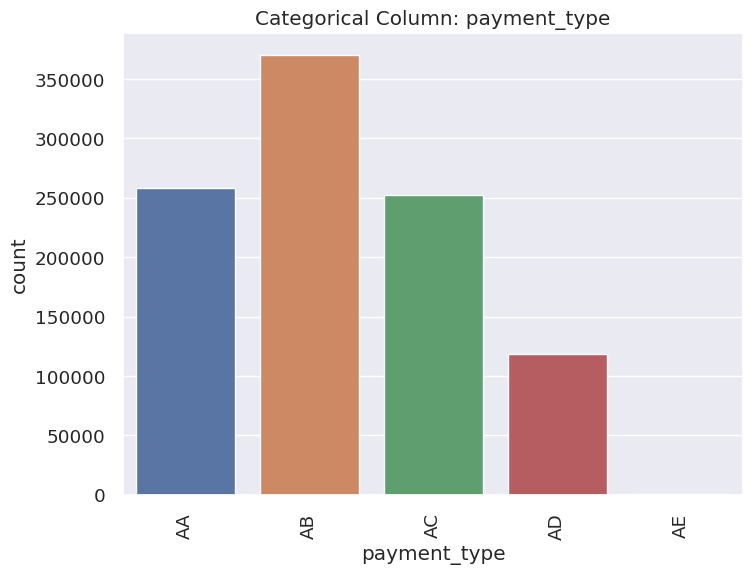

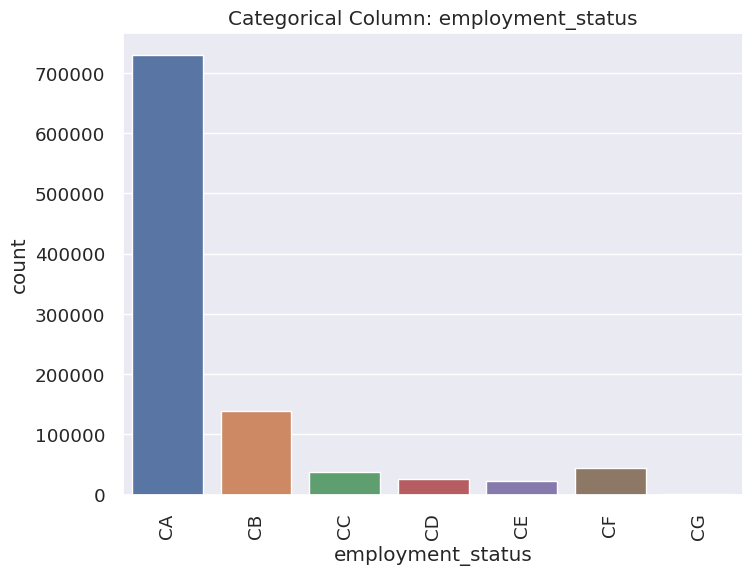

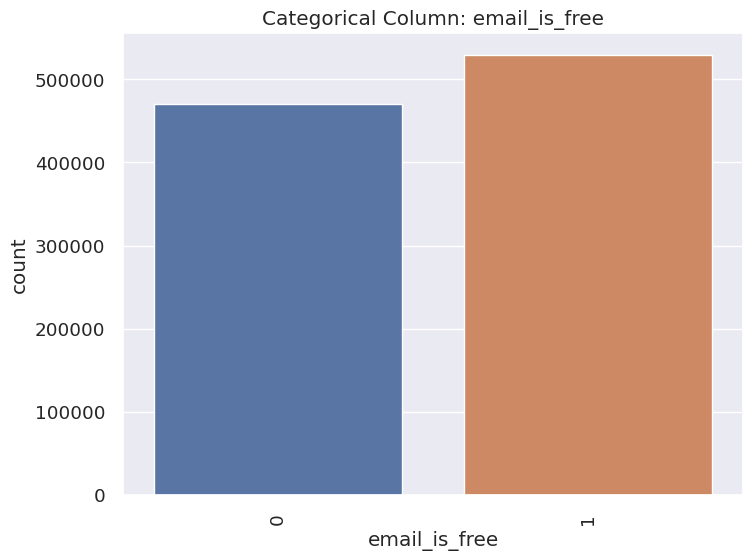

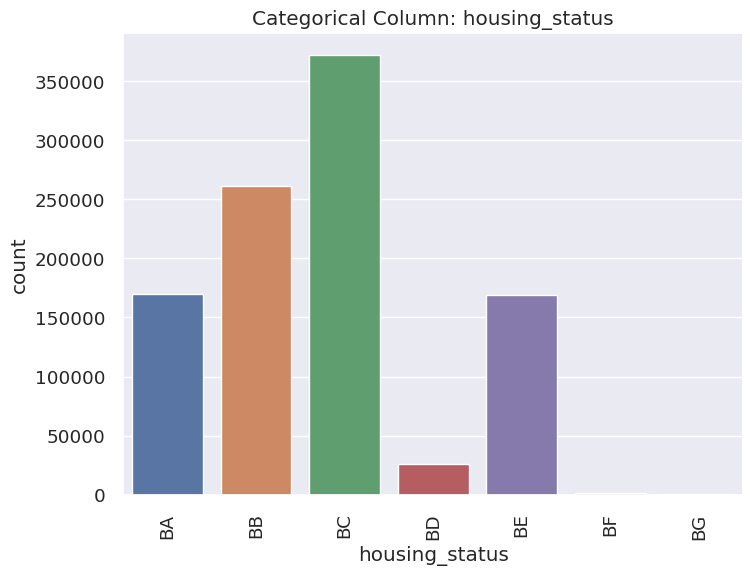

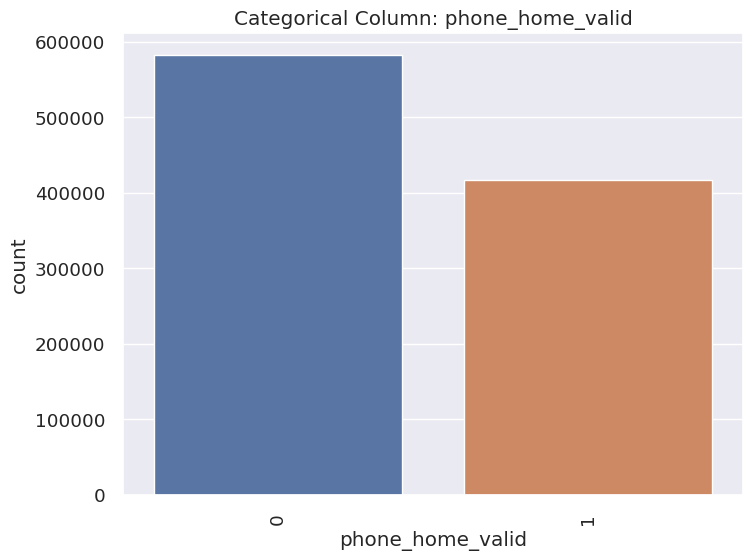

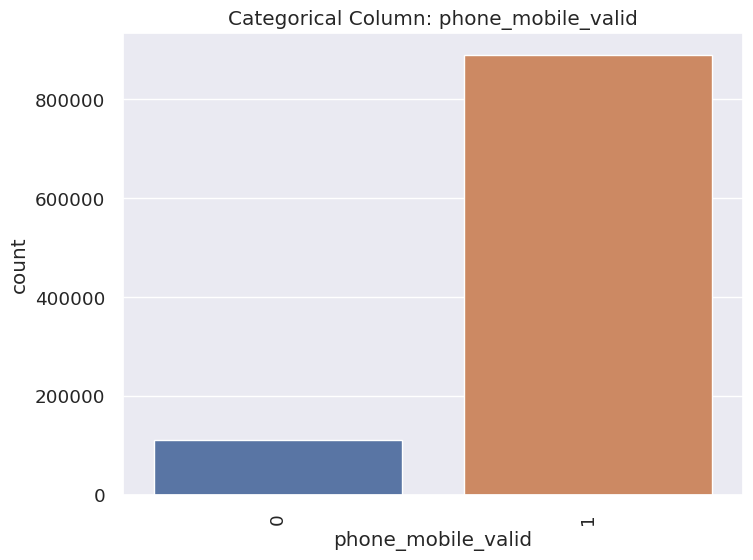

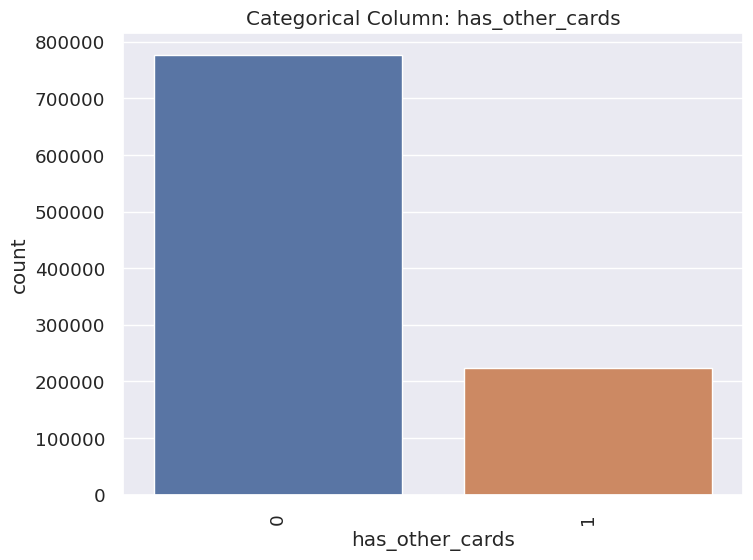

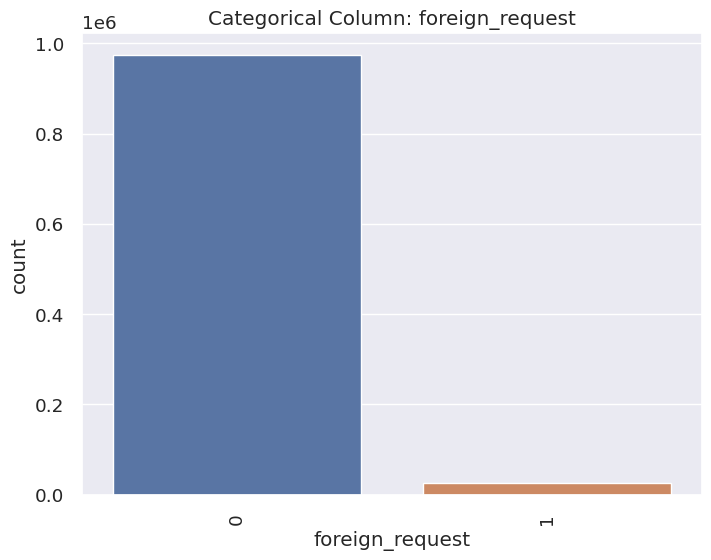

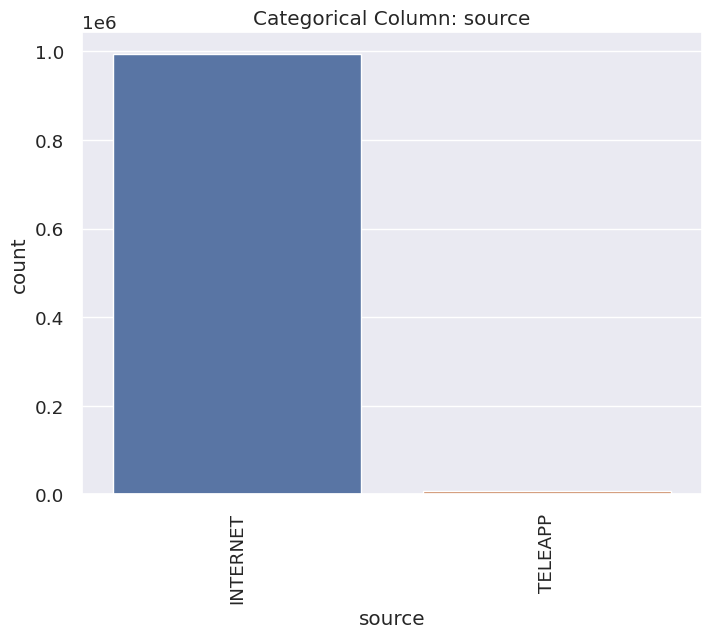

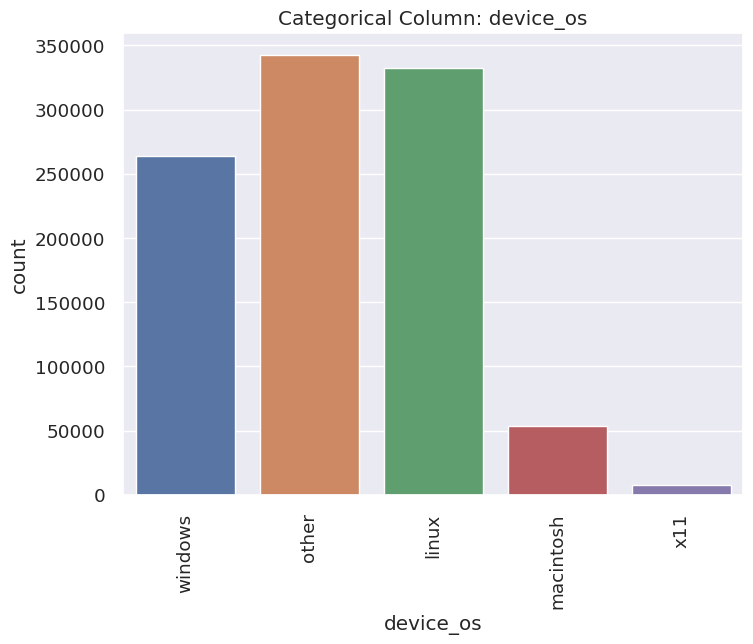

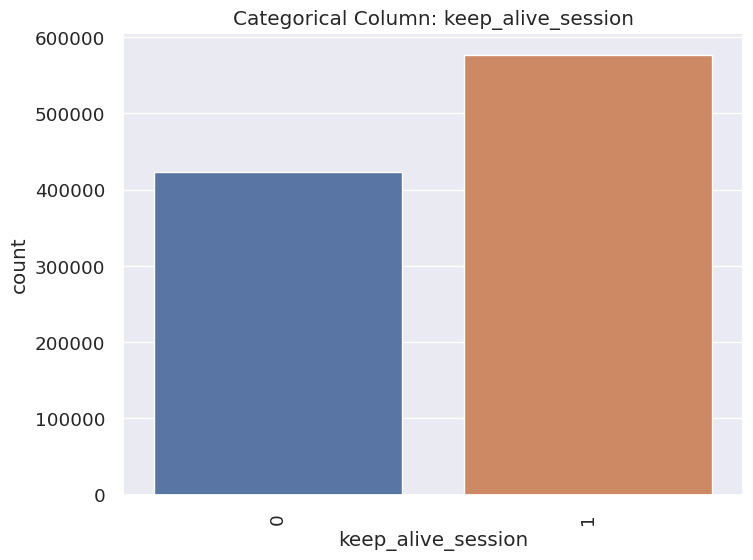

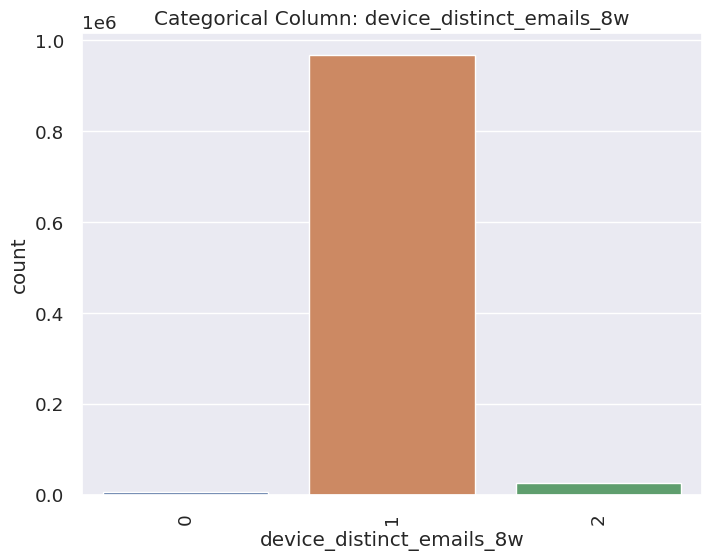

In [ ]:
df.plot_categorical_columns()

# Handle the outliers:

In [ ]:
df.describe(flag='numerical')

,name_email_similarity,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,86.617645,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,131.054037,515.851010,7.562193,3.288674
std,0.289125,88.378266,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.620753,487.559902,8.023925,2.209994
min,0.000001,0.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,190.000000,0.000872,0.000000
1%,0.021672,1.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,200.000000,0.710603,0.000000
25%,0.225216,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,200.000000,3.122461,1.000000
50%,0.492153,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,200.000000,5.131503,3.000000
75%,0.755567,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,500.000000,8.866131,5.000000
99%,0.997470,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,1500.000000,44.552828,7.000000
max,0.999999,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,2100.000000,85.899143,7.000000


In [ ]:
column_with_outliers=df.find_numerical_columns_with_possible_outliers()

In [ ]:
column_with_outliers

['current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'proposed_credit_limit',
 'session_length_in_minutes']

In [ ]:
# df.handle_outliers(column_with_outliers)

In [7]:
data=df.get_data()

In [8]:
# split the data
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

In [9]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

In [10]:
data = preprocessing(X_train, y_train)

In [11]:
scalers = {}
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('robust',column)
    scalers[column] = scaler

In [12]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [13]:
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'label')
    encoders[column] = encoder

In [14]:
for column in X_test.select_dtypes(include=['object','category']).columns:
    X_test[column]=encoders[column].transform(X_test[column].values.reshape(-1, 1))

In [15]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [16]:
X_train,y_train=data.get_data()

In [20]:
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

# Logistic regression:

In [ ]:
param_grid = {'class_weight':['balanced'] }
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: LogisticRegression(class_weight='balanced')
Best score: 0.8576664969081476
AUC: 0.8584635876445808
TPR:  44.79% 
FPR:  5.0% 
Threshold:  0.77
Predictive Equality:  93.96%


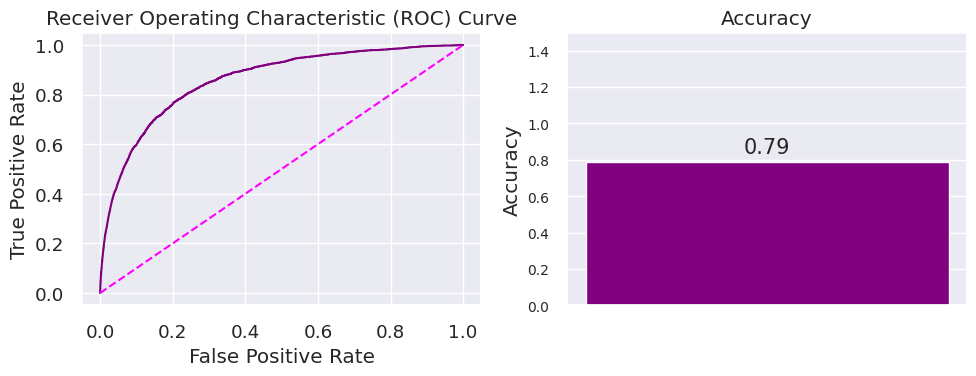

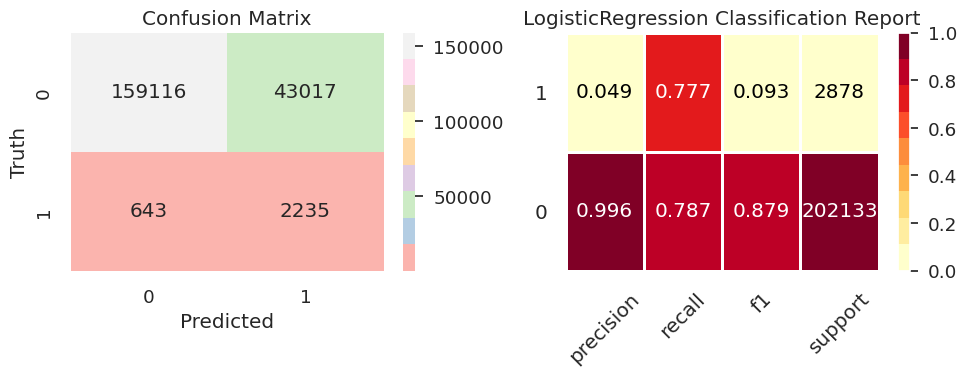

CPU times: user 21.9 s, sys: 6.78 s, total: 28.7 s
Wall time: 32.7 s


In [ ]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

# XGB Classifier

In [ ]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'scale_pos_weight': [89.67005],     # Class weight for handling imbalanced datasets
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'scale_pos_weight': 89.67005, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, scale_pos_weight=89.67005)
Best score: 0.8910185903386432
AUC: 0.8886955891649058
TPR:  53.790000000000006% 
FPR:  4.99% 
Threshold:  0.76
Predictive Equality:  93.49%


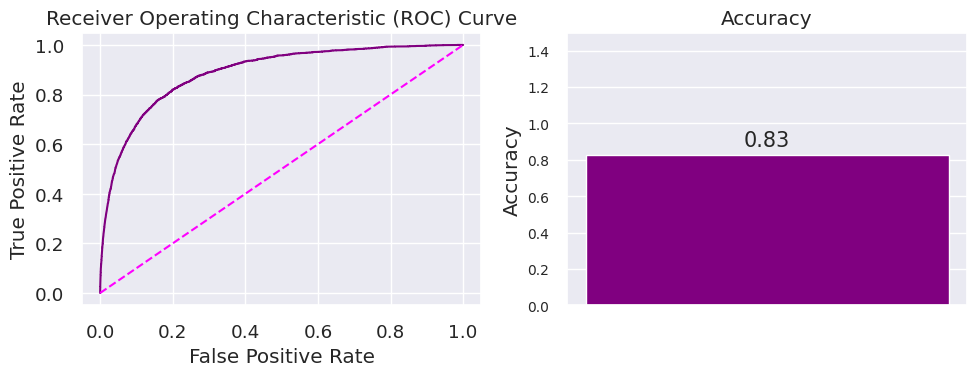

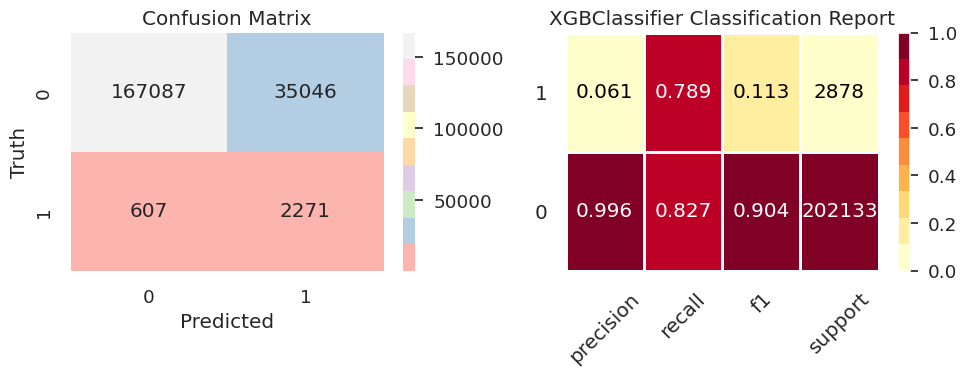

CPU times: user 2min 43s, sys: 2.09 s, total: 2min 45s
Wall time: 4min 45s


In [ ]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

# Random forest:

In [ ]:
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100],              # Number of trees in the forest - Default value is 100
    'criterion': ['gini'],   # The function to measure the quality of a split
    'max_depth': [None],                # Maximum depth of the trees - Default value is None (unlimited)
    'min_samples_split': [2],           # Minimum number of samples required to split an internal node - Default value is 2
    'min_samples_leaf': [1],            # Minimum number of samples required to be at a leaf node - Default value is 1
    'bootstrap': [True],                # Whether bootstrap samples are used when building trees - Default value is True
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Best estimator: RandomForestClassifier()
Best score: 0.8207050622579928
AUC: 0.8340371584033351
TPR:  43.99% 
FPR:  4.7% 
Threshold:  0.09
Predictive Equality:  39.04%


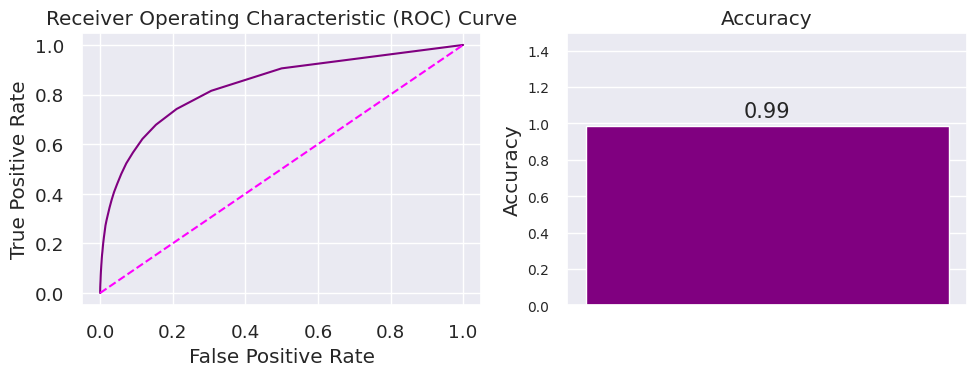

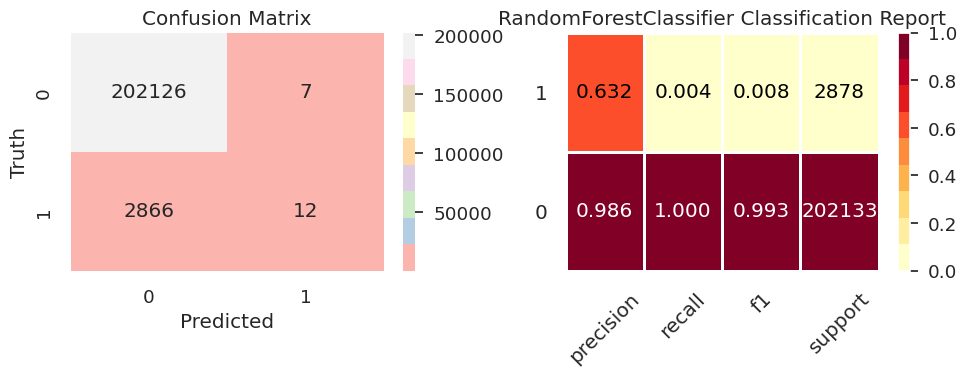

CPU times: user 10min 30s, sys: 2.21 s, total: 10min 32s
Wall time: 18min 23s


In [ ]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

# AdaBoost Classifier

In [ ]:
# Define the AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50],              # Number of estimators (weak learners) - Default value is 50
    'learning_rate': [1.0],            # Learning rate for each weak learner - Default value is 1.0
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 50, 'learning_rate': 1.0}
Best estimator: AdaBoostClassifier()
Best score: 0.8894166555060188
AUC: 0.8895373673338818
TPR:  53.580000000000005% 
FPR:  4.99% 
Threshold:  0.48
Predictive Equality:  100.0%


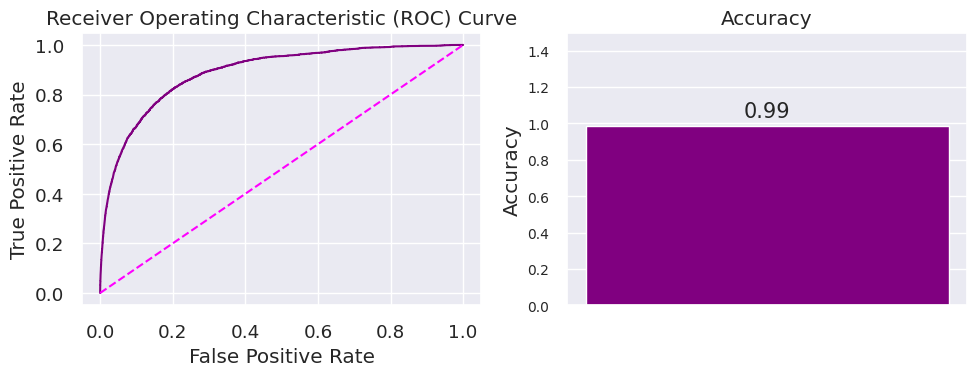

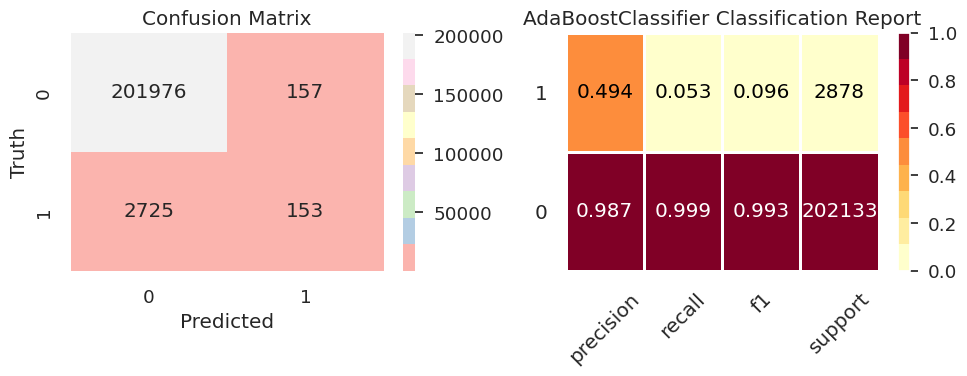

CPU times: user 2min 38s, sys: 1.11 s, total: 2min 39s
Wall time: 4min 54s


In [ ]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

# LGBM

In [ ]:
from lightgbm import LGBMClassifier
# Define the LGBMClassifier
lgbm_model = LGBMClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100],                 # Number of boosting rounds (weak learners) - Default value is 100
    'learning_rate': [0.1],                # Learning rate for each boosting round - Default value is 0.1
    'max_depth': [-1],                     # Maximum depth of the trees - Default value is -1 (unlimited)
    'num_leaves': [31],                    # Maximum number of leaves in one tree - Default value is 31
    'min_child_samples': [20],             # Minimum number of data points in a leaf - Default value is 20
    'subsample': [1.0],                    # Subsample ratio of the training instances - Default value is 1.0
    'colsample_bytree': [1.0],             # Subsample ratio of columns when constructing each tree - Default value is 1.0
    'reg_alpha': [0],                      # L1 regularization term on weights - Default value is 0
    'reg_lambda': [0],                     # L2 regularization term on weights - Default value is 0
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best estimator: LGBMClassifier(reg_alpha=0, reg_lambda=0)
Best score: 0.8891625857381843
AUC: 0.8873156957559099
TPR:  52.5% 
FPR:  5.0% 
Threshold:  0.04
Predictive Equality:  29.409999999999997%


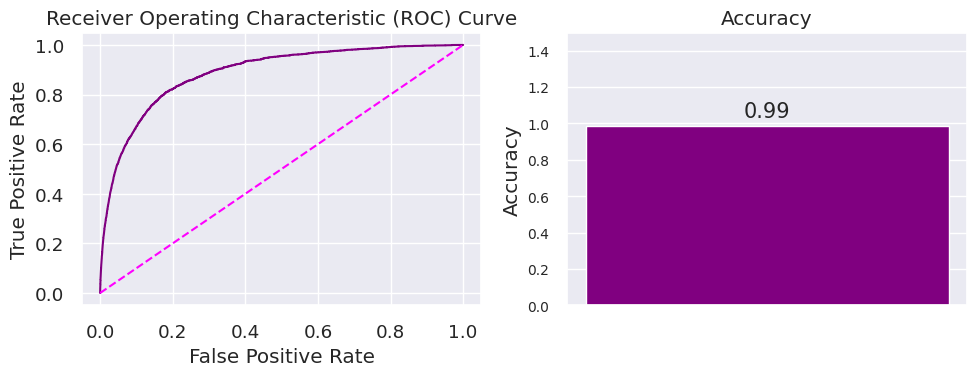

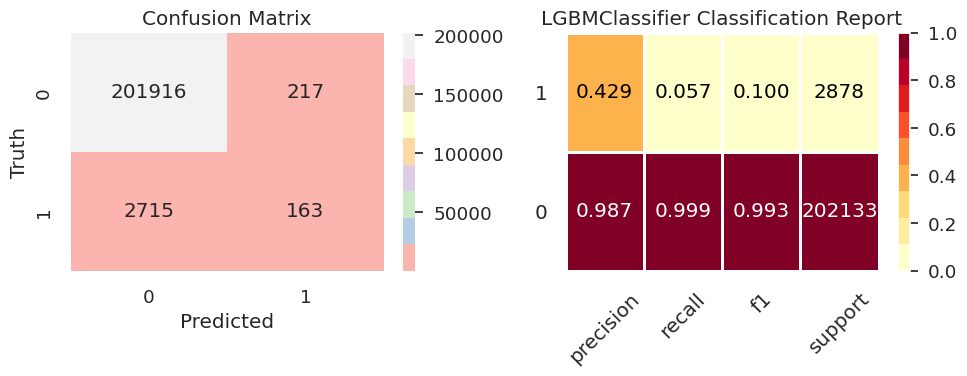

CPU times: user 31.8 s, sys: 863 ms, total: 32.6 s
Wall time: 50.2 s


In [ ]:
%%time
experiment.train(lgbm_model,param_grid=param_grid,search_type='random')

# NN Model

In [17]:
# Keras model using dropout and batch normalization
nn_model2 = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
experiment=nn_modeling(nn_model2, X_train,X_test,y_train,y_test,train_groups,test_groups)

In [19]:
%%time
hist = experiment.compile_and_train(lr = 1e-2)

Epoch 1/100
1398/1398 [==============================] - 23s 14ms/step - loss: 1.1166 - fn: 1875.0000 - fp: 188214.0000 - tn: 519125.0000 - tp: 6276.0000 - precision: 0.0323 - recall: 0.7700 - f1: 0.0662 - val_loss: 0.5453 - val_fn: 0.0000e+00 - val_fp: 19558.0000 - val_tn: 59941.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
1398/1398 [==============================] - 19s 13ms/step - loss: 1.0349 - fn: 1817.0000 - fp: 154076.0000 - tn: 553263.0000 - tp: 6334.0000 - precision: 0.0395 - recall: 0.7771 - f1: 0.0758 - val_loss: 0.4967 - val_fn: 0.0000e+00 - val_fp: 17364.0000 - val_tn: 62135.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
1398/1398 [==============================] - 19s 13ms/step - loss: 1.0226 - fn: 1831.0000 - fp: 150151.0000 - tn: 557188.0000 - tp: 6320.0000 - precision: 0.0404 - recall: 0.7754 - f1: 0.0778 - val_loss: 0.5386 - val_fn: 0.000

6407/6407 [==============================] - 11s 2ms/step
AUC: 0.8763213684291912
TPR:  49.27% 
FPR:  5.0% 
Threshold:  0.92
Predictive Equality:  86.24000000000001%


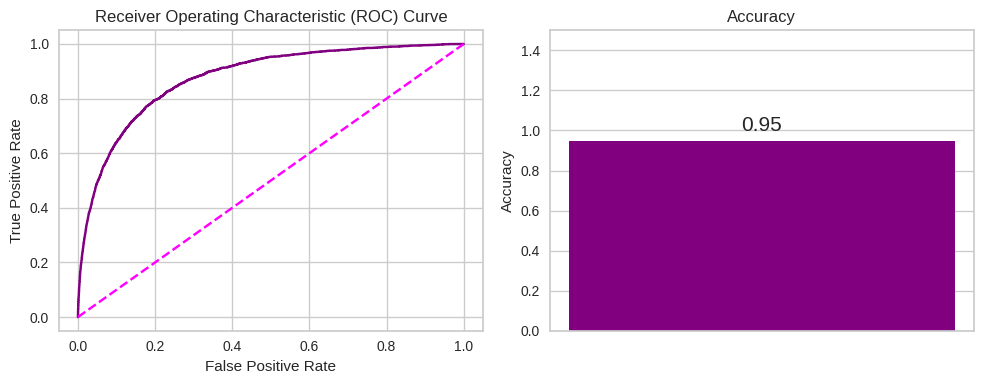

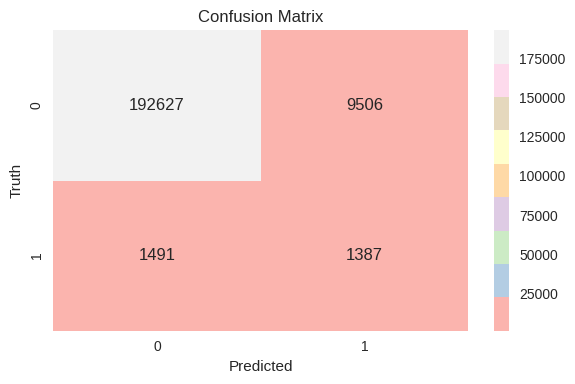

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.48      0.20      2878

    accuracy                           0.95    205011
   macro avg       0.56      0.72      0.59    205011
weighted avg       0.98      0.95      0.96    205011



In [20]:
experiment.score_keras_model()

# Tune The Best Model

In [18]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'scale_pos_weight': [89.67005],     # Class weight for handling imbalanced datasets
    'learning_rate': [0.01, 0.05, 0.1], # Learning rate for boosting
    'n_estimators': [50, 100, 200],     # Number of boosting rounds

}

Fitting 1 folds for each of 9 candidates, totalling 9 fits
Best hyperparameters: {'scale_pos_weight': 89.67005, 'n_estimators': 200, 'learning_rate': 0.1, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, n_estimators=200, scale_pos_weight=89.67005)
Best score: 0.8943614154421732
AUC: 0.8911558394765001
TPR:  54.269999999999996% 
FPR:  5.0% 
Threshold:  0.78
Predictive Equality:  86.99%


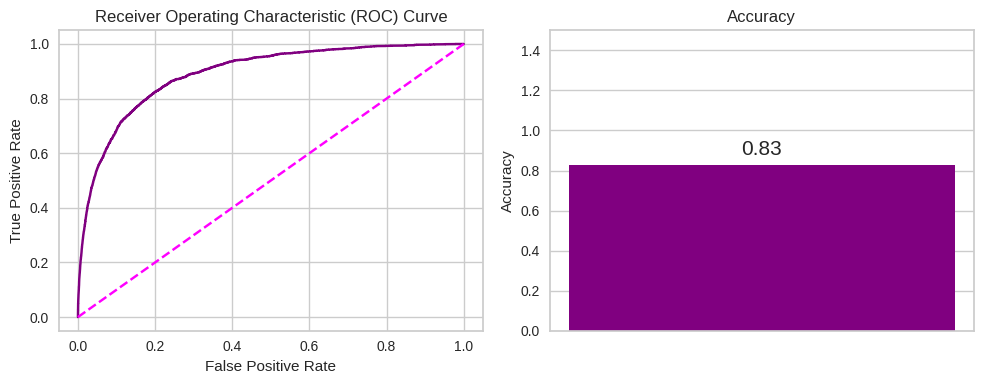

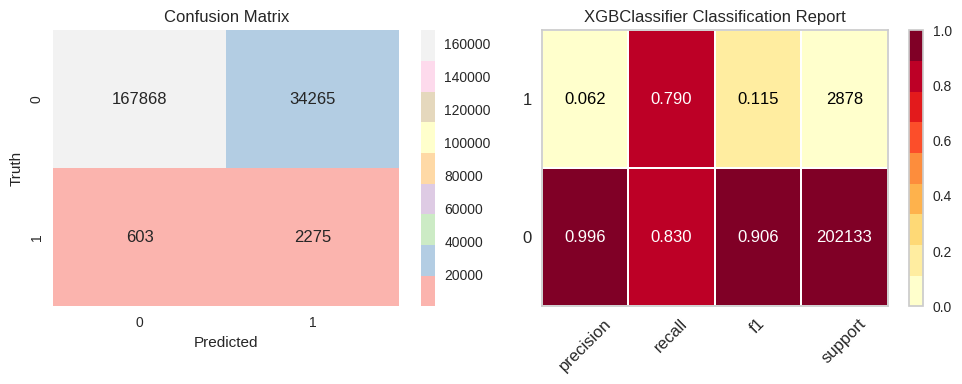

CPU times: user 5min 27s, sys: 4.61 s, total: 5min 31s
Wall time: 27min 8s


In [21]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [22]:
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.78, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.14      0.54      0.22      2878

    accuracy                           0.95    205011
   macro avg       0.56      0.74      0.59    205011
weighted avg       0.98      0.95      0.96    205011

[[192340   9793]
 [  1334   1544]]


In [23]:
experiment.save_model('XGB_Tunning')

'XGB_Tunning'